# Predicting Heart Disease Using Machine Learning 

This notebook looks into various python based machine 
learning & data science libraries in anattempt 
in an attempt  to build a machine learning model 
capable of predicting whether or not someone has 
heart disease based on their medical attributes


We're going to take the following approach: 
1. problem Defination
2. data
3. evaluating 
4. features 
5. modelling 
6. experimentation 


## 1. Problem Statement
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease ?

## 2. Data

The Original data came from the Cleavland data from the UCI Maching Learning Repository. 
There is also a version of it available on kaggle 

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project!!

## 4. Features 

This is where you'll get different information about each  of the features in your data.

**Create Data Dictionary** 

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical , angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
 

## Preparing the tools 

we're going to use pandas, Matplotlib, and Numpy for data analysis and manipulation 

In [1]:
# Import all the tools we need 

# Regular EDA (Expploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook 
%matplotlib inline 


# Model from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score


## Load Data 

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploration data analysis EDA)

The goal here is to find out more and become a subject metter export on the dataset you're working with.

1. What Question(s) are you tring to solve ?
2. What kind of data do we have and how do we treat different types ?
3. what's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there 
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

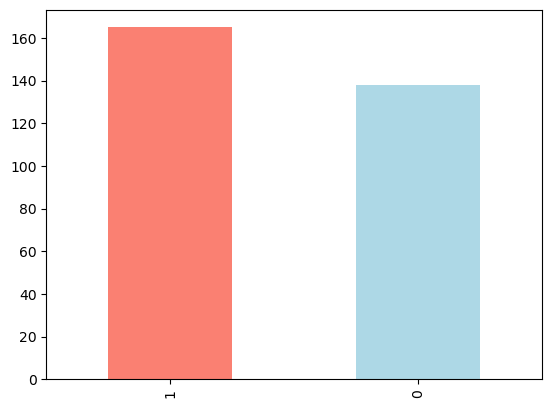

In [6]:
# Visualization!!
df['target'].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])

In [7]:
# To check the information about data-set, To check "Empty rows or not"  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Another way...
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare sex column with target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


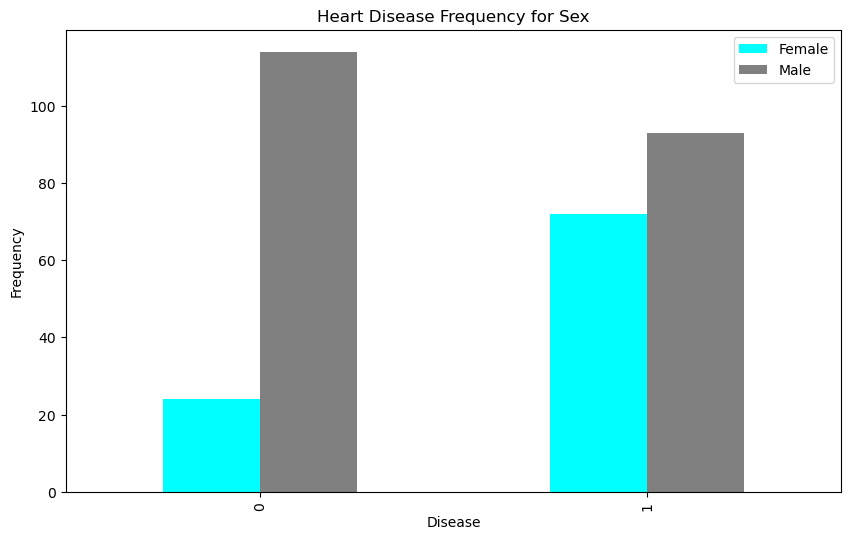

In [12]:
# Create a plot for crosstab 
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                   figsize=(10, 6), 
                                   color=["cyan", "grey"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.legend(['Female', 'Male'])

### Age vs. Max Heart Rate for Heart Disease

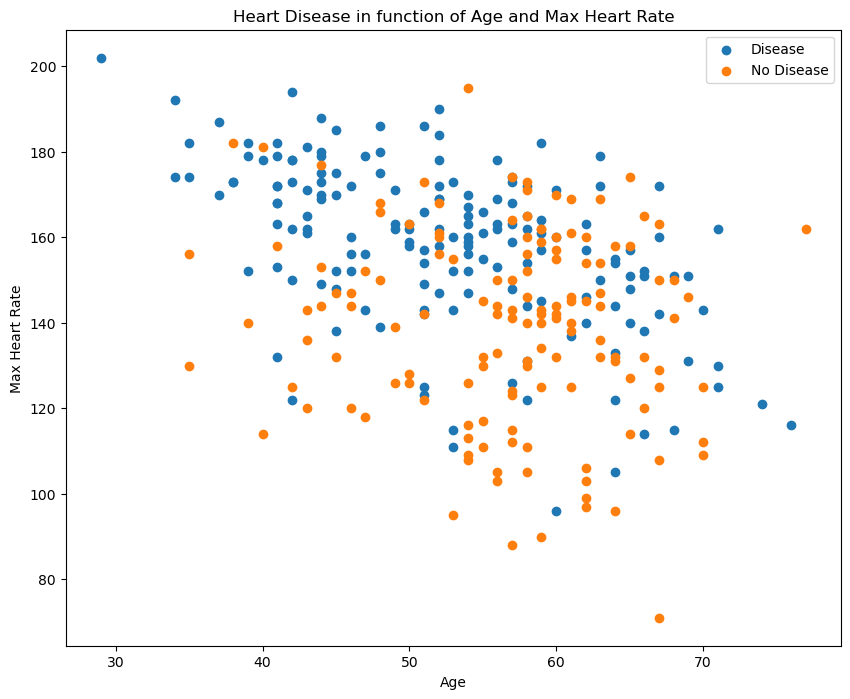

In [13]:
# Create Another Figure
plt.figure(figsize=(10,8))


# Scatter With Possitive Examples 
plt.scatter(df.age[df.target == 1], 
           df.thalach[df.target == 1])

# Scatter With Negative Examples
plt.scatter(df.age[df.target == 0], 
           df.thalach[df.target == 0])

# add some helpfull info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

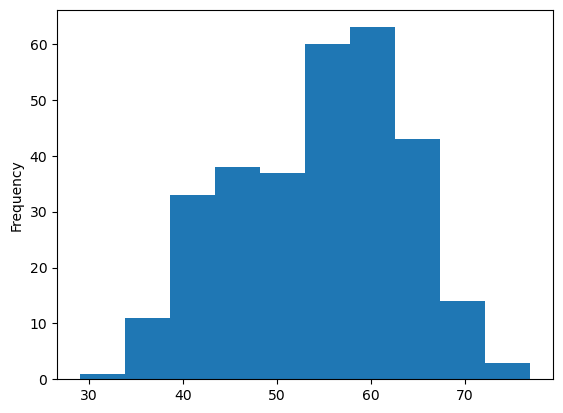

In [14]:
# Check the distribution of age distribution with a histogram 
df.age.plot.hist();

### Heart Disease Frequency per chest pain type

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


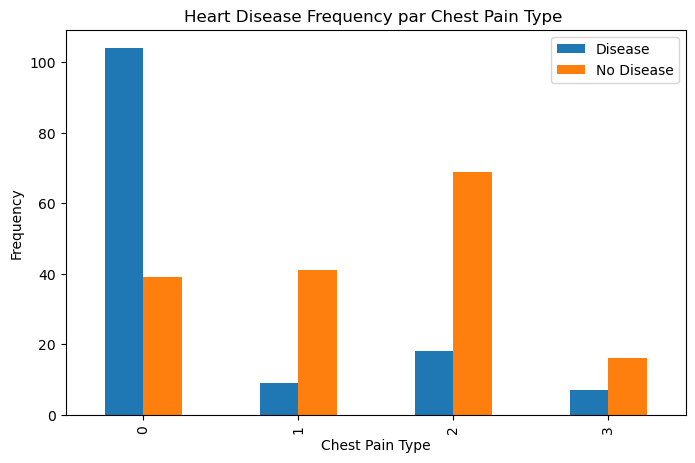

In [16]:
# Make more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                  figsize=(8,5))

# Add Some Communication
plt.title("Heart Disease Frequency par Chest Pain Type ")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["Disease", "No Disease"])

## 5. Modelling 

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df['target']

# Split Data into train & Test set
np.random.seed(42)

# Training & Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



* Now we're got our data split into training and test set, it's time to build a machine learning model

* We'll train it (find the patterns) on the traning set. 

* And we'll test it (use the patterns)


We're going to try three machine learning model!!!
1. Logistic Regression (Logistic-Regression falls under the category of Classifier)
2. K-Neighbour Classifier 
3. Random Forest Classifier 



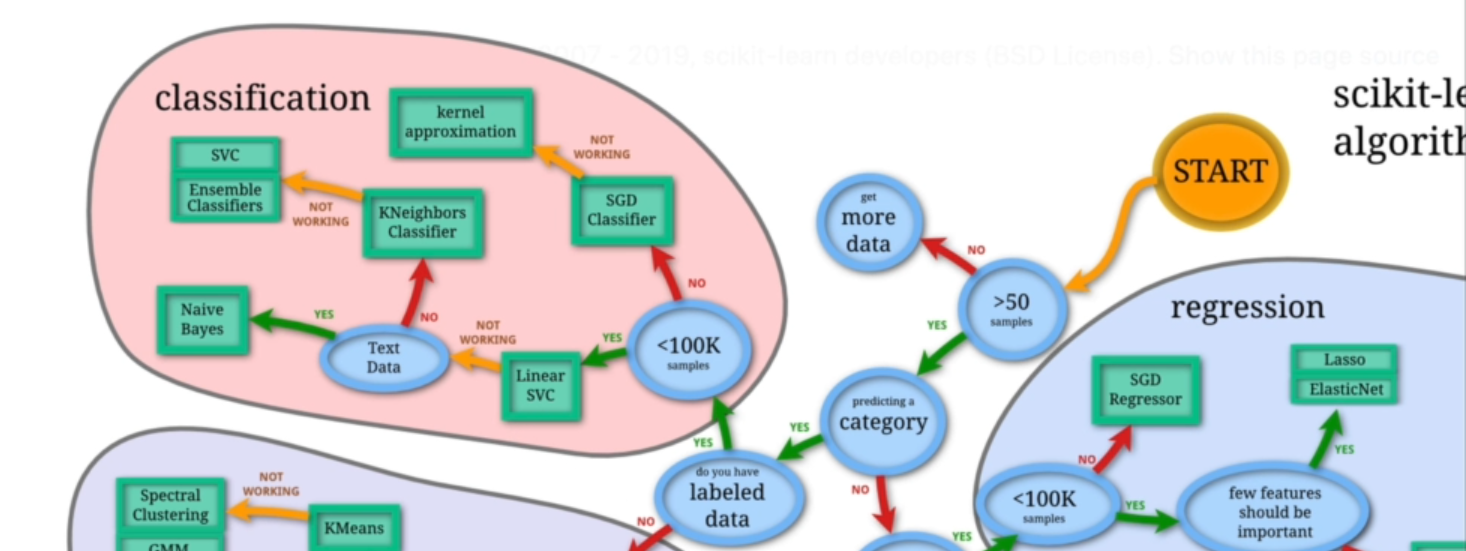

In [19]:
# Put models in a dictionary 
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(), 
    'Random Forest Classifier': RandomForestClassifier()
}

# (Creating a function in such a way that will test all the three models of Scikit-Learn & Gives fit & score)
# Create a Function to fit and score models 
def fit_score_model(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models
    Model: a dictionary of Scikit-learn machine learning models 
    X_train: Training Data (no labels)
    X_test: Testing Data (no labels)
    y_train: Training labels
    y_test: Testing labels
    """
    
    # Seed (To make our result reproducible)
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_score = {}
    
    # loop through models 
    for name, model in models.items(): # name is the "key" & model is the value of the dictionary "models"
        # Fit the model to the data 
        model.fit(X_train, y_train)
        
        # Evaulate the model & append its score to model_scores 
        model_score[name] = model.score(X_test, y_test)
        
    return model_score


In [23]:
model_score = fit_score_model(models, X_train, X_test, y_train, y_test)
model_score

D:\Software\Anaconda Software\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## Model Comparison

<Axes: >

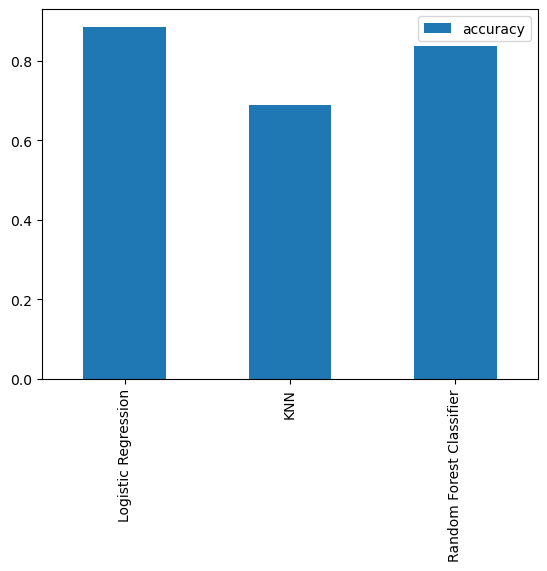

In [24]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
# T --> Represent the transpose 
model_compare.T.plot.bar()

# Just a Recape 
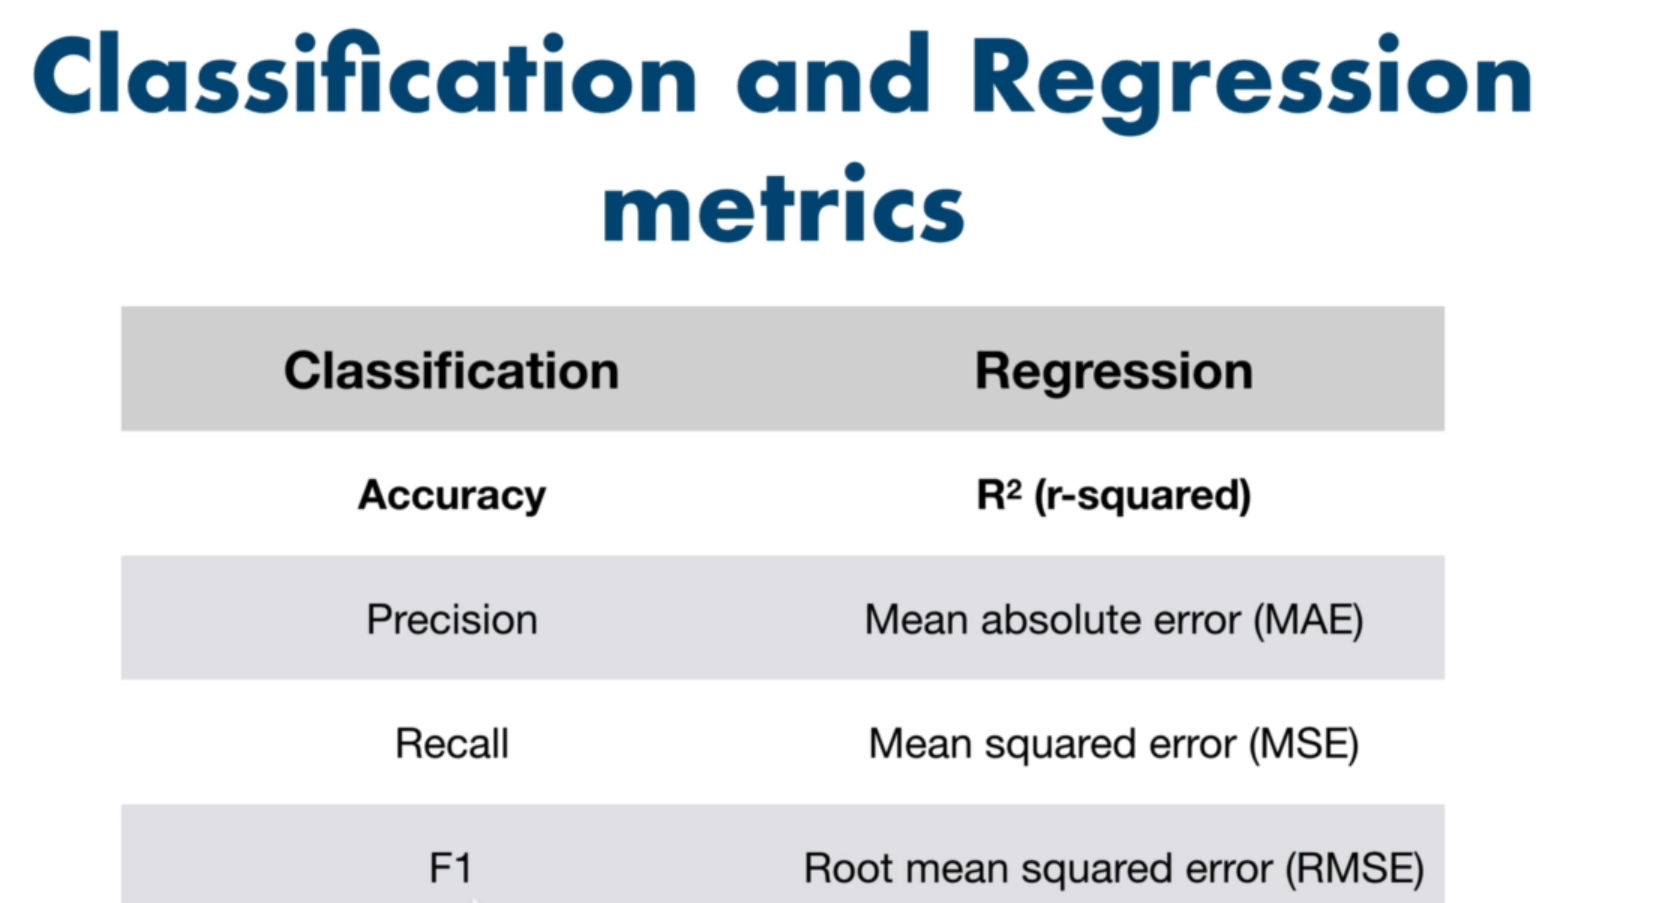

Here's for predicting Heart Disease Logistic Regression model is the best out of this three

**Let's look at the following:** 
1. Hyperparameter tuning (This features are special, & can be use for any model whether it is classication Model / Regression Model)
2. Feature importance (This features are special, & can be use for any model whether it is classication Model / Regression Model)
3. Confusion matrix
4. cross-verification
5. Precision
6. Recall
7. F1 score 
8. Classification report 
9. Area under the curve (AUC) 

## HyperParameter Tuning 

In [26]:
# By Default the values of n_neighbor is '5'
# But we are tuning it to increase the accuracy of model, experimenting in a hope that this model may increase it's accuracy wrt '0.6885245901639344'

# Let's tune KNN
train_score = []
test_score = []

# Create list of different values of n_neighbors 
neighbor = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbor:
    knn.set_params(n_neighbors = i)
    
    # Fit the model with training data set 
    knn.fit(X_train, y_train)
    
    # Update the train_score with different values of knn training scores 
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test_score with different values of knn testing scores 
    test_score.append(knn.score(X_test, y_test))
    

In [27]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Accuracy after tuning the KNN model is: 75.41%


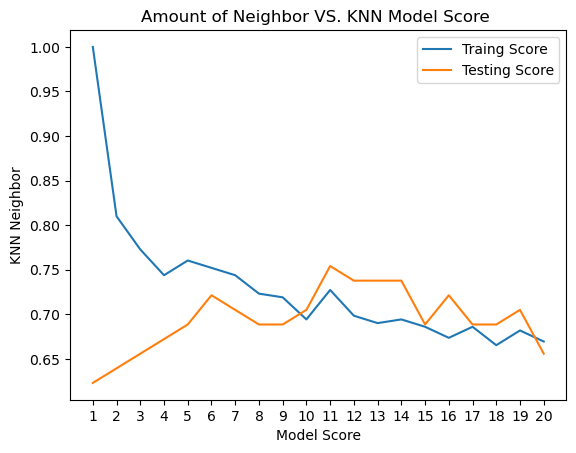

In [29]:
# Graph Analysis
plt.plot(neighbor, train_score)
plt.plot(neighbor, test_score)
plt.title("Amount of Neighbor VS. KNN Model Score ")
plt.xlabel("Model Score")
plt.ylabel("KNN Neighbor")
plt.xticks(range(1,21,1)); # This will purity the visuality of x-axis 
plt.legend(["Traing Score", "Testing Score"])

print(f"Maximum Accuracy after tuning the KNN model is: {max(test_score) * 100:.2f}%")

**Since After Tuning the KNN model, it's accuracy jumped from approx 64% to 75% Which is far below then Logistic Regression Model even without tuning that!!😂**

## HyperParameter Tuning with RandamizedSearchCV

CV --> Cross Validation

We're going to tune: 
* logisticRegression()
* RandomForestClassifier()

... using RandomSearchCV


In [30]:
# Create a hyperparameter grid for LogisticRegression
logistic_grid = {
    "C": np.logspace(-4, 4, 20), 
    "solver": ["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier
randomforest_grid = {
    "n_estimators": np.arange(10,1000,50), 
    "max_depth": [None, 3, 5, 10], 
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}


Now we're buliding tuned LogisticRegression model 

In [31]:
np.random.seed(42)

# Creating Tuned Model - LogisticRegression 
logistic_model = RandomizedSearchCV(LogisticRegression(), 
                                   param_distributions=logistic_grid, 
                                   cv = 5, 
                                   n_iter = 20, 
                                   verbose=True)

# Fit the training data into tuned model 
logistic_model.fit(X_train, y_train)

# Score the training data into tuned model
logistic_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

**Just, After tuning this LogisticRegression model, The accuracy remains the same 😂😂 approx 88%**

In [32]:
# Let's See what were the best combination which helped the model to produce the best possible score
logistic_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Now, let's Build tuned model based on RandomForestClassifier 

In [33]:
np.random.seed(42)

# Creating tuned RandomForestClassifier model
randomforest_model = RandomizedSearchCV(RandomForestClassifier(), 
                                       param_distributions=randomforest_grid, 
                                       cv = 5, 
                                       n_iter = 20,
                                       verbose=True)



In [34]:
# Fiting data into the Tuned RandomForestClassifier, By using the RandomizedSearchCV
randomforest_model.fit(X_train, y_train)

# Score for Tuned RandomForestClassifier, By using the RandomizedSearchCV
randomforest_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

**Thus, After tuning RandomForestClassifier, Accuracy Raised from approx 84% to 87%**

... Which is an increament in a model after tuning Model!!

In [35]:
# Let's see what were the parameter value's combination helped the model to produce the best possible score
randomforest_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Without tuned model's score 
model_score["Random Forest Classifier"]

0.8360655737704918

## Hyperparameter Tuning using GridSearchCV

Since our LogisticRegression model provides the best score so far, we'll try/check improve the LogisticRegression model only!! 

In [44]:
# Different hyperparameter for logisticRegression model 
another_logistic_grid = {
    "C": np.logspace(-4, 4, 30), 
    "solver": ["liblinear"]
}

# Setup grid hyperparameter search for LogisticRegression 
another_logistic_reg = GridSearchCV(LogisticRegression(),
                        param_grid=another_logistic_grid,
                        cv=5,
                        verbose = True)

# Fit the model 
another_logistic_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [45]:
# Score TIme!!
another_logistic_reg.score(X_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy 

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

...and it would be great if cross-varification was used where possible

To make prediction and evaluate our trained model, first we need to make predictions

In [46]:
# Make prediction with tuned model
y_preds = logistic_model.predict(X_test)


In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [61]:
# Plot ROC Curve

In [63]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

